# Basic Image Processing tutorial

Basic image data manipulation is introduced, using OpenCV library.
The sample image is obtained from [PEXELS](https://www.pexels.com/).

[OpenCV](http://opencv.org/) is image processing library which supports 
 - loading image in numpy.ndarray format, save image
 - converting image color format (RGB, YUV, Gray scale etc)
 - resize

 and other useful image processing functionality.

To install opencv, execute

` $conda install -c https://conda.binstar.org/menpo -y opencv3 `

In [40]:
import os

import matplotlib.pyplot as plt
import cv2
%matplotlib inline


def readRGBImage(imagepath):
    image = cv2.imread(imagepath)  # Height, Width, Channel
    (major, minor, _) = cv2.__version__.split(".")
    if major == '3':
        # version 3 is used, need to convert
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        # Version 2 is used, not necessary to convert
        pass
    return image

## Loading and save image

- `cv2.imread` for loading image.
- `cv2.imwrite` for save image.
- `plt.imshow` for plotting, and `plt.savefig` for save plot image.

OpenCV image format is usually 3 dimension (or 2 dimension if the image is gray scale).

1st dimension is for height,
2nd dimension is for width,
3rd dimension is for channel (RGB, YUV etc).

To convert color format `cv2.cvtColor` can be used.
Details are written in next section.

In [41]:
# Read image from file, save image with matplotlib using `imshow` function
basedir = './src/cnn/images'
imagepath = os.path.join(basedir, 'sample.jpeg')

#image = cv2.imread(imagepath, cv2.IMREAD_GRAYSCALE)
image = readRGBImage(imagepath)

# Width and Height shows pixel size of this image 
# Channel=3 indicates the RGB channel 
print('image.shape (Height, Width, Channel) = ', image.shape)

# Save image with openCV
# This may be blue image because the color format RGB is opposite.
cv2.imwrite('./src/cnn/images/out.jpg', image)  
# bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
# cv2.imwrite('./src/cnn/images/out.jpg', bgr_image)  

# Plotting
plt.imshow(image)
plt.savefig('./src/cnn/images/out_plt.jpg')

image.shape (Height, Width, Channel) =  (380, 512, 3)


## Change color format

- `cv2.cvtColor` for converting color format.

Note that openCV version 3 reads the image color in the order B, G, R.
However, matplotlib deals with the image color in the corder R, G, B.
So you need to convert color order, refer `readRGBImage` function.

If the image is gray scale, the image is 2 dimensional array

1st dimension is for height,
2nd dimension is for width.

In [42]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Gray scale image is 2 dimension, No channel dimension. 
print('gray_image.shape (Height, Width) = ', gray_image.shape)
cv2.imwrite('./src/cnn/images/out_gray.jpg', gray_image)

gray_image.shape (Height, Width) =  (380, 512)


True

## Resize

- `cv2.imread` for resize.

Note that size should be specified in the order width, height.

image.shape (Height, Width, Channel) =  (380, 512, 3)
half_image.shape (Height, Width, Channel) =  (190, 256, 3)
resized128_image.shape (Height, Width, Channel) =  (95, 128, 3)


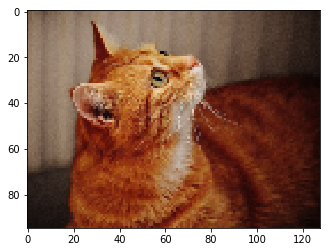

In [43]:
%matplotlib inline
print('image.shape (Height, Width, Channel) = ', image.shape)

# Resize image to half size
height, width = image.shape[:2]
half_image = cv2.resize(image, (width//2, height//2))  # size must be int
print('half_image.shape (Height, Width, Channel) = ', half_image.shape)
plt.imshow(half_image)
plt.savefig('./src/cnn/images/out_half.jpg')


# Resize image by specifying longer side size
def resize_longedge(image, pixel):
    """Resize the input image
    
    Longer edge size will be `pixel`, and aspect ratio doesn't change
    """
    height, width = image.shape[:2]
    longer_side = max(height, width)
    ratio = float(pixel) / longer_side
    return cv2.resize(image, None, fx=ratio, fy=ratio)  # size must be int

resized128_image = resize_longedge(image, 128)
print('resized128_image.shape (Height, Width, Channel) = ', resized128_image.shape)
plt.imshow(resized128_image)
plt.savefig('./src/cnn/images/out_resized128.jpg')

## Crop

- numpy slicing can be used for cropping image

In [44]:
%matplotlib inline
# Crop center of half_image 

height, width = half_image.shape[:2]

crop_length = min(height, width)

height_start = (height - crop_length) // 2
width_start = (width - crop_length) // 2

cropped_image = half_image[
                height_start:height_start+crop_length, 
                width_start:width_start+crop_length,
                :] 
print('cropped_image.shape (Height, Width, Channel) = ', cropped_image.shape)
plt.imshow(cropped_image)
plt.savefig('./src/cnn/images/out_cropped.jpg')

cropped_image.shape (Height, Width, Channel) =  (190, 190, 3)


## Image processing with channels

RGB channel manipulation.

Understanding the meaning of "channel" is important in deep learning. 
Below code provides some insight that what each channel represents.

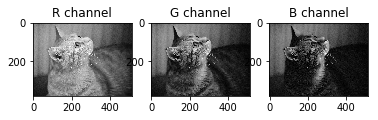

In [45]:
%matplotlib inline
# Show RGB channel separately in gray scale

fig, axes = plt.subplots(1, 3)

# image[:, :, 0] is R channel.
axes[0].set_title('R channel')
axes[0].imshow(image[:, :, 0], cmap='gray')
# image[:, :, 1] is G channel.
axes[1].set_title('G channel')
axes[1].imshow(image[:, :, 1], cmap='gray')
# image[:, :, 2] is B channel.
axes[2].set_title('B channel')
axes[2].imshow(image[:, :, 2], cmap='gray')
plt.savefig(os.path.join(basedir, 'RGB_gray.jpg'))

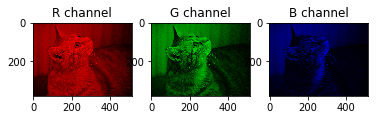

In [46]:
# Show RGB channel separately in color
fig, axes = plt.subplots(1, 3)

# image[:, :, 0] is R channel, replace the rest by 0.
imageR = image.copy()
imageR[:, :, 1:3] = 0
axes[0].set_title('R channel')
axes[0].imshow(imageR)

# image[:, :, 1] is G channel, replace the rest by 0.
imageG = image.copy()
imageG[:, :, [0, 2]] = 0
axes[1].set_title('G channel')
axes[1].imshow(imageG)

# image[:, :, 2] is B channel, replace the rest by 0.
imageB = image.copy()
imageB[:, :, 0:2] = 0
axes[2].set_title('B channel')
axes[2].imshow(imageB)
plt.savefig(os.path.join(basedir, 'RGB_color.jpg'))